### OGTIP Oeson - Data Science Internship
# Project 2

## Project Description

- Give descriptive statistics about relevant fields in the data.
- Plot charts to bring out necessary information from the dataset.
- State inference with a relevant statement.

In [529]:
import pandas as pd

df = pd.read_csv("HRDataset_v14.csv")

## Descriptive Statistics & Plots

In [530]:
# Import descriptive statistics calculation function from Scipy, Matplotlib and Seaborn libraries
from scipy.stats import describe
import matplotlib.pyplot as plt
import seaborn as sns

### Descriptive Statistics of Salary 

,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(45046, 250000)",69020.684887,6.328564e+08,3.290213,15.185607


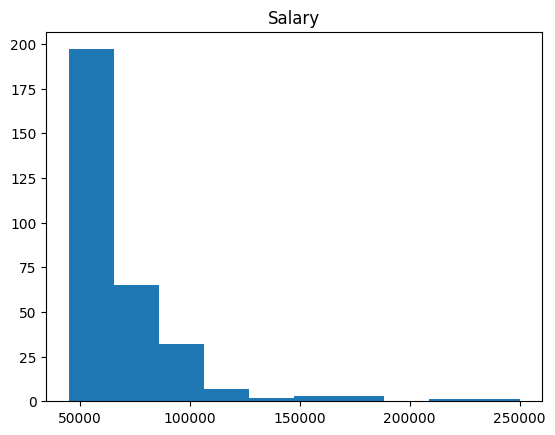

In [531]:
ds = describe(df["Salary"])._asdict()
display(pd.DataFrame([ds], columns=ds.keys()))

plt.hist(df["Salary"])
plt.title("Salary")
plt.show()

High kurtosis is an indicator that data has heavy tails or outliers.<br>
The salary is not evenly distributed and skewed. <br>
The majority of people get paid around 50000-70000. <br>

### Salary distribution between Male and Female

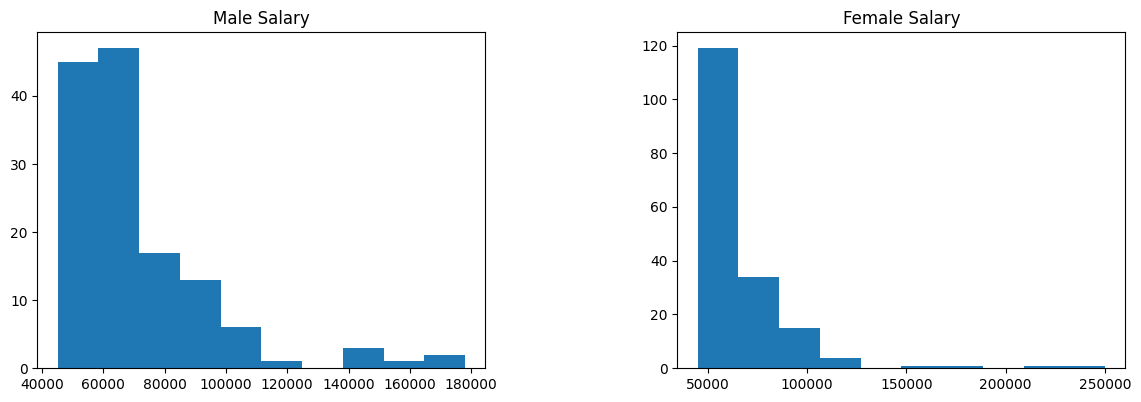

In [532]:
# Get male and female data seperately
male = df[df["Sex"].str.contains("M")]
female = df[df["Sex"].str.contains("F")]

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.7, 0.7])
ax2 = fig.add_axes([1, 0, 0.7, 0.7])


ax1.hist(male["Salary"])
ax1.set_title("Male Salary")

ax2.hist(female["Salary"])
ax2.set_title("Female Salary")

plt.show()

The salary between men and women has the same trend that most of them fall to about 50000-70000. <br>
There is almost no difference in terms of gender of salary distribution. <br>

### Descriptive Statistics of Engagement Survey

,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(1.12, 5.0)",4.11,0.624001,-1.111585,1.12669


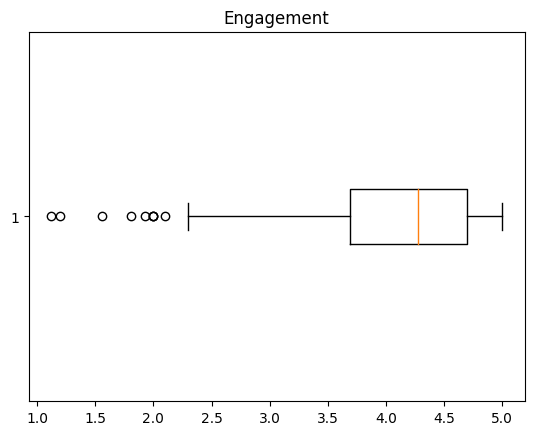

In [533]:
ds = describe(df["EngagementSurvey"])._asdict()
display(pd.DataFrame([ds], columns=ds.keys()))

plt.boxplot(df["EngagementSurvey"], vert=False)
plt.title("Engagement")
plt.show()

The Engagement of employees has the mean value of 4.11.<br>
So the employee seems very engaged with the work in general.<br>

### Descriptive Statistics of Employee Satisfaction

,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(1, 5)",3.890675,0.826719,-0.221534,-0.769625


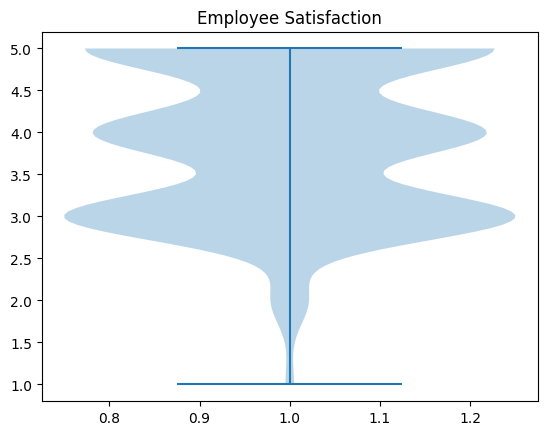

In [534]:
# Descriptive Statistics of Employee Satisfaction
ds = describe(df["EmpSatisfaction"])._asdict()
display(pd.DataFrame([ds], columns=ds.keys()))

plt.violinplot(df["EmpSatisfaction"])
plt.title("Employee Satisfaction")
plt.show()

As shown, most of the employees have shown quite good job satisfaction due to the mean vlaue of 3.8.<br>

### Heatmap of Features correlations

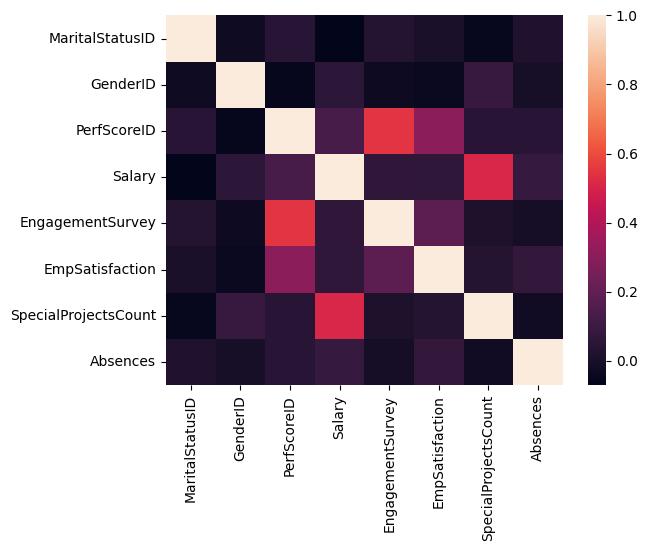

In [535]:
sns.heatmap(df[["MaritalStatusID", "GenderID", "PerfScoreID", "Salary", "EngagementSurvey", "EmpSatisfaction", "SpecialProjectsCount", "Absences"]].corr())
plt.show()

By looking at the heatmap, we could see that Engagement and Performance Scores are highly correlated.<br>
The number of special projects also plays a role in determining an employee's salary.<br>
Besides, there's also a correlation between employees' satisfaction with their Performance as well <br>

### Correlation between the number of Special Projects and Salary of employees

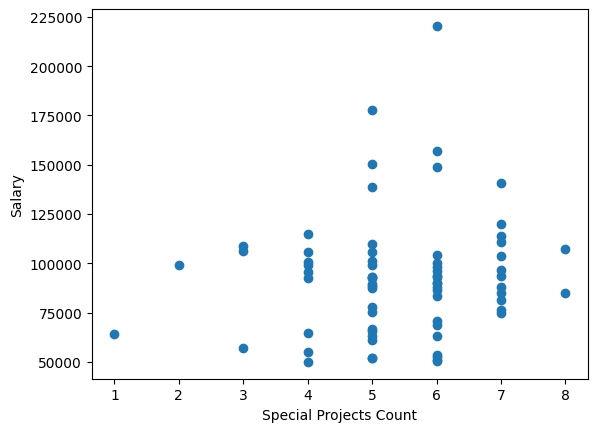

In [536]:
# Get employees has special projects
has_special_projects = df[df["SpecialProjectsCount"] > 0]

plt.scatter(has_special_projects["SpecialProjectsCount"], has_special_projects["Salary"])
plt.xlabel("Special Projects Count")
plt.ylabel("Salary")

plt.show()

There is a high correlation between the number of special projects and the salary of the employees.<br>
The employee who has the highest salary has done 6 special projects.<br>
This could be useful for further observation to build a model for Salary prediction.<br>

### Correlation between Engagement and Satisfaction of employees and their Performance 

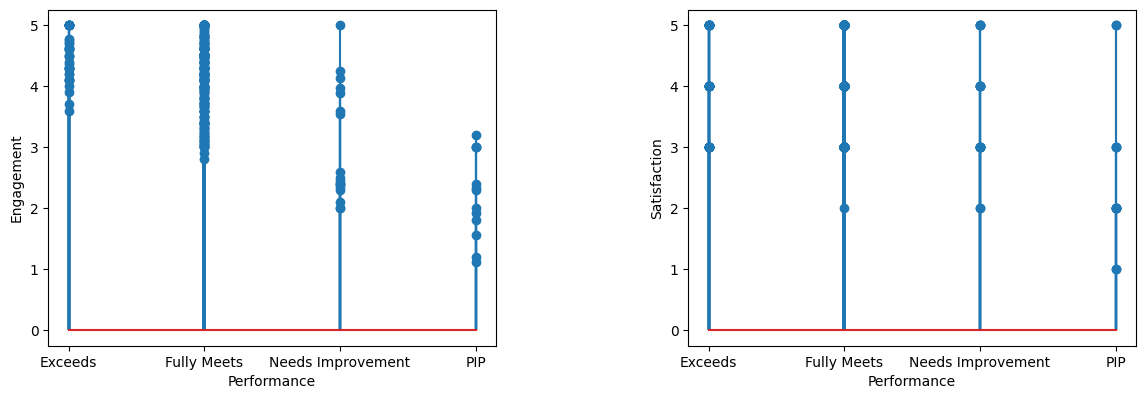

In [538]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.7, 0.7])
ax2 = fig.add_axes([1, 0, 0.7, 0.7])


ax1.stem(df["PerformanceScore"], df["EngagementSurvey"])
ax1.set_xlabel("Performance")
ax1.set_ylabel("Engagement")

ax2.stem(df["PerformanceScore"], df["EmpSatisfaction"])
ax2.set_xlabel("Performance")
ax2.set_ylabel("Satisfaction")

plt.show()

The group of employees who need improvement and PIP tend to have lower company engagement.<br>
On the other hand, with great engagement, it is sure that employees would perform really well in their work.<br>
The same pattern happens with satisfaction, the performance seems to be increased with the incline of satisfaction.<br>

## Summary

- There are outliers in the distribution of Salary, it is also uneven and skewed. 
- There is very least difference in the distribution of salary by gender, most employees have 50000 to 70000 salaries.
- The company has high Engagement and Satisfaction feedback with mean of 4.11 and 3.8
- The Salary of an employee partly depends on the number of special projects that have been done.  
- Engagement and Satisfaction could be used to predict their performance, due to high correlations.